In [1]:
##This is to plot the aF collection experiments
#Setting matplotlib to be inline
%matplotlib inline

#Importing the necessary libraries
from os import listdir
from os.path import isfile, join

import re
import csv

import pandas as pd

import FlowCytometryTools
from FlowCytometryTools import FCMeasurement

from pylab import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kendalltau
from scipy.stats import ttest_ind

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

C:\Users\saisr\Anaconda3\lib\site-packages\FlowCytometryTools\core\docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)
C:\Users\saisr\Anaconda3\lib\site-packages\FlowCytometryTools\core\docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)


In [2]:
###
#These are functions to be used here.
###
##Function to change bar plot's bar width.
def change_barwidth(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [3]:
#Set the root directory
data_dir = '20190721_Ylipolytica CEN plasmid expression/';
extra_dir = '20190721_Ylipolytica CEN plasmid expression/Test/';

#Printing file list
fileList = [f for f in listdir(data_dir) if f.endswith(".fcs")]
print("Data files:")
print("\n".join(fileList))

#Printing file list
fileListExtra = [f for f in listdir(extra_dir) if f.endswith(".fcs")]
print("Data files:")
print("\n".join(fileListExtra))

Data files:
Colony02 1000h_8369_005.fcs
Colony02 1000h_B11_005.fcs
Colony02 1000h_B11_005_rep.fcs
Colony02 1000h_C9_005.fcs
Colony02 1000h_D11_005.fcs
Colony02 1000h_D1_005.fcs
Colony02 1000h_E_005.fcs
Colony02 1000h_E_005_rep.fcs
Colony02 1000h_Ste6_005.fcs
Colony02 1000h_yali005.fcs
Colony02 700h_8369_005.fcs
Colony02 700h_B11_005.fcs
Colony02 700h_C9_005.fcs
Colony02 700h_D11_005.fcs
Colony02 700h_D1_005.fcs
Colony02 700h_E_005.fcs
Colony02 700h_E_005_rep.fcs
Colony02 700h_Ste6_005.fcs
Colony02 700h_yali005.fcs
Data files:
Colony02 ON culture_8369_005.fcs
Colony02 ON culture_B11_005.fcs
Colony02 ON culture_C9_005.fcs
Colony02 ON culture_D11_005.fcs
Colony02 ON culture_D1_005.fcs
Colony02 ON culture_E_005.fcs
Colony02 ON culture_Ste6_005.fcs
Colony02 ON culture_yali005.fcs


## Below is to try and analyze the (.fcs) files directly.

In [4]:
#Starting with just a few files to work out the data handling
YlSte6_01 = FCMeasurement(ID='YlSte6', 
                        datafile=data_dir+'/Colony02 1000h_E_005.fcs')
#YlSte6_02 = FCMeasurement(ID='YlSte6', 
#                          datafile=root_dir+data_dir+'/NewGrowth 4hr_E05973-8369 yali005 02.fcs')
ScSte6_01 = FCMeasurement(ID='ScSte6', 
                          datafile=data_dir+'/Colony02 1000h_Ste6_005.fcs')
#ScSte6_02 = FCMeasurement(ID='ScSte6', 
#                          datafile=root_dir+data_dir+'/NewGrowth 4hr_ste6-8369 yali005 02.fcs')
TM46cloneA_01 = FCMeasurement(ID='TM4-6/cloneA', 
                          datafile=data_dir+'/Colony02 1000h_B11_005.fcs')
#TM46cloneA_02 = FCMeasurement(ID='TM4-6/cloneA', 
#                          datafile=root_dir+data_dir+'/NewGrowth 4hr_E05973-B11-8369 yali005 02.fcs')
TM46cloneB_01 = FCMeasurement(ID='TM4-6/cloneB', 
                          datafile=data_dir+'/Colony02 1000h_C9_005.fcs')
#TM46cloneB_02 = FCMeasurement(ID='TM4-6/cloneB', 
#                          datafile=root_dir+data_dir+'/NewGrowth 4hr_E05973-tmh4-6-C9-8369 yali005 02.fcs')
TM1012cloneC_01 = FCMeasurement(ID='TM10-12/cloneC', 
                          datafile=data_dir+'/Colony02 1000h_D1_005.fcs')
#TM1012cloneC_02 = FCMeasurement(ID='TM10-12/cloneC', 
#                          datafile=root_dir+data_dir+'/NewGrowth 4hr_E05973-tmh10-12-D1-8369 yali005 02.fcs')
TM1012cloneD_01 = FCMeasurement(ID='TM10-12/cloneD', 
                          datafile=data_dir+'/Colony02 1000h_D11_005.fcs')
#TM1012cloneD_02 = FCMeasurement(ID='TM10-12/cloneD', 
#                          datafile=root_dir+data_dir+'/NewGrowth 4hr_E05973-tmh10-12-D11-8369 yali005 02.fcs')

#NegCtrl = FCMeasurement(ID='Null', 
#                        datafile=root_dir+data_dir+'/NewGrowth 4hr_yali005.fcs')
NegCtrl_01 = FCMeasurement(ID='Empty', 
                        datafile=data_dir+'/Colony02 1000h_8369_005.fcs')

print(YlSte6_01.channel_names)
print(YlSte6_01.shape)

('FSC-A', 'FSC-H', 'FSC-W', 'SSC-A', 'SSC-H', 'SSC-W', 'FITC-A', 'FITC-H', 'PE-Texas Red-A', 'PE-Texas Red-H', 'PE-Cy5-A', 'PE-Cy5-H', 'Time')
(30533, 13)


C:\Users\saisr\Anaconda3\lib\site-packages\matplotlib\colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


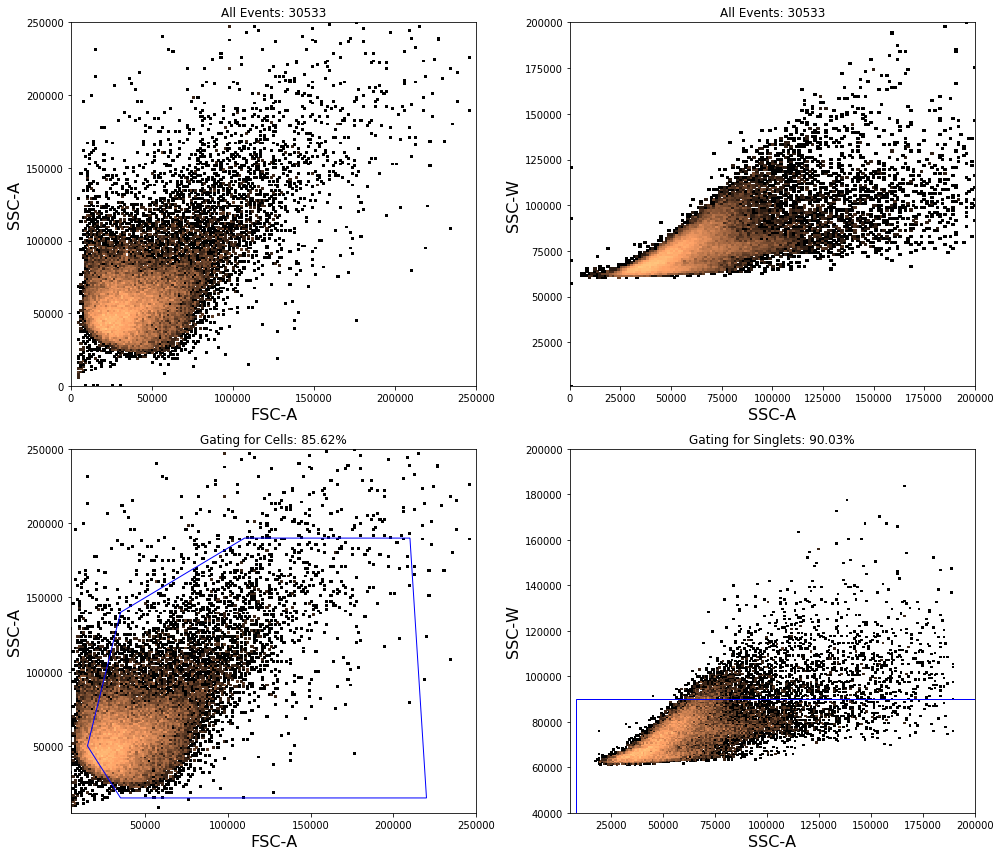

In [5]:
#This is to setup the initial gating I will be doing.
from FlowCytometryTools import ThresholdGate, PolyGate
#This is for data from the Aria, populations that are being sorted
cellsGate = PolyGate([(15000,50000), (35000,140000), (110000,190000), (210000,190000), 
                      (220000,15000), (35000,15000)], ['FSC-A','SSC-A'], region='in', 
                     name='Ylipolytica cells')
#cellsGate = PolyGate([(35000,50000), (65000,140000), (110000,190000), (210000,190000), 
#                      (220000,15000), (55000,15000)], ['FSC-A','SSC-A'], region='in', 
#                     name='Yeast cells')
singletsGate = PolyGate([(8256,8738), (8256,90000), (200000,90000), (200000,8738)], 
                        ['SSC-A','SSC-W'], region='in', name='Singlets')
#singletsGate = PolyGate([(8256,8738), (8256,110000), (200000,110000), (200000,8738)], 
#                        ['SSC-A','SSC-W'], region='in', name='Singlets')
#This is specifically for data from the Fortessa
#cellsGate = PolyGate([(23737,17000), (58827,242285), (249760,231362), (227054,17000)], 
#                     ['FSC-A','SSC-A'], region='in', name='Yeast cells')
#singletsGate = PolyGate([(8256,8738), (8256,88850), (252856,88850), (252856,8738)], 
#                        ['SSC-A','SSC-W'], region='in', name='Singlets')

YlSte6_01_Cells = YlSte6_01.gate(cellsGate)
YlSte6_01_Singlets = YlSte6_01_Cells.gate(singletsGate)
#print("The gated events as cells are: ", 
#(100*galE05973_Cells.get_data().shape[0]/galE05973.get_data().shape[0]))
#print("The gated events as singlets are: ", 
#(100*galE05973_Singlets.get_data().shape[0]/galE05973_Cells.get_data().shape[0]))

#I am going to be plotting these in the figures above, and in particular the Singlets 
#are gated on the Yeast Cell population.
figure(figsize=(14,12))
ax1 = subplot(221)
YlSte6_01.plot(['FSC-A','SSC-A'], kind='histogram');
title('All Events: {}'.format(YlSte6_01.get_data().shape[0]));
xlim((0,250000))
ylim((0,250000))
ax2 = subplot(222)
YlSte6_01.plot(['SSC-A','SSC-W'], kind='histogram');
title('All Events: {}'.format(YlSte6_01.get_data().shape[0]));
xlim((0,200000))
ylim((1000,200000))
ax3 = subplot(223)
YlSte6_01.plot(['FSC-A','SSC-A'], kind='histogram', gates=[cellsGate]);
title('Gating for Cells: {0:.2f}%'.format
      (100*YlSte6_01_Cells.get_data().shape[0]/YlSte6_01.get_data().shape[0]));
xlim((5000,250000))
ylim((5000,250000))
ax2 = subplot(224)
YlSte6_01_Cells.plot(['SSC-A','SSC-W'], kind='histogram', gates=[singletsGate]);
title('Gating for Singlets: {0:.2f}%'.format
      (100*YlSte6_01_Singlets.get_data().shape[0]/YlSte6_01_Cells.get_data().shape[0]));
xlim((5000,200000))
ylim((40000,200000))
plt.tight_layout()

#savefig('test.png')

In [6]:
##These are all the functions 
#These are functions to plot the sub-sampled medians to get a 95% confidence interval 
##on the median
def sampledMedianGFP(well):
    """Calculates the median FITC-A fluorescence of events from FACS and provides a 
    95% confidence interval by using a sub-sampling to calculate the Median"""
    medianList = []
    for iterCount in range(0, 100):
                data = well.data['FITC-A'].sample(75000)
                medianList.append(data.median())
                #data = well.subsample(90000, order='random', auto_resize=True).get_data()
                #medianList.append(data.median())
    medianPandas = pd.DataFrame(medianList)
    return medianPandas
    #return medianPandas[0].mean(), 2*medianPandas[0].std()

def sampledMedianRFP(well):
    """Calculates the median PE-Texas Red-A fluorescence of events from FACS and provides a 
    95% confidence interval by using a sub-sampling to calculate the Median"""
    medianList = []
    for iterCount in range(0, 100):
                data = well.data['PE-Texas Red-A'].sample(75000)
                medianList.append(data.median())
                #data = well.subsample(90000, order='random', auto_resize=True).get_data()
                #median.append(data['PE-Texas Red-A'].median())
    medianPandas = pd.DataFrame(medianList)
    return medianPandas
    #return medianPandas[0].mean(), 2*medianPandas[0].std()

#This is the function to apply the gating to the various samples.
def singletCellGating(well):
    """Applies the gates that have been defined above as cellsGate and singletsGate"""
    Cells = well.gate(cellsGate)
    Singlets = Cells.gate(singletsGate)
    return Singlets

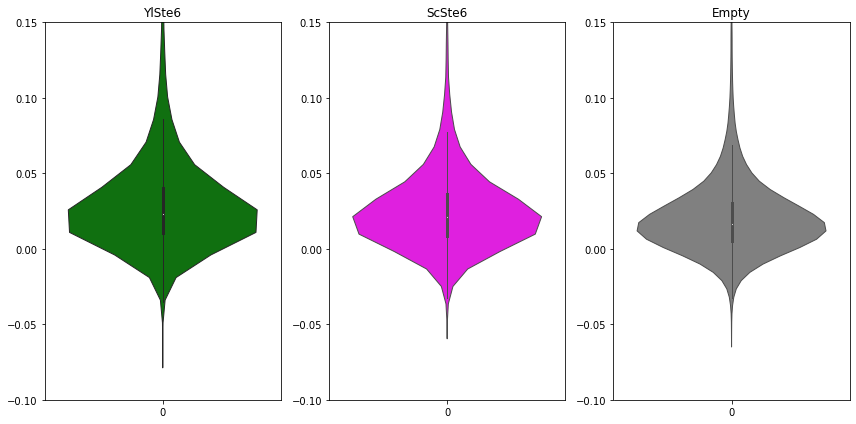

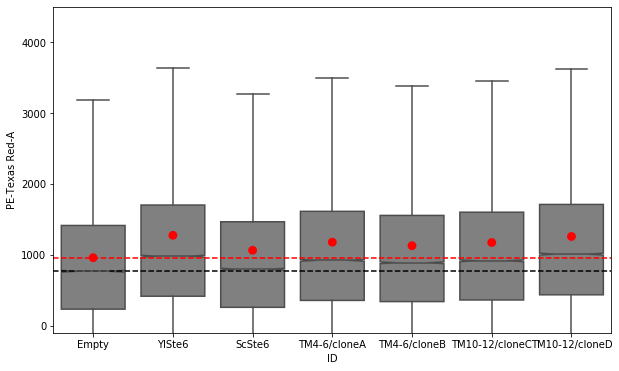

In [8]:
#fitcData = ({finalRafE05973.ID, finalRafE05973.data['FITC-A']}, 
#            {finalGalE05973.ID, finalGalE05973.data['FITC-A']}, 
#            {finalGalSte6.ID, finalGalSte6.data['FITC-A']})
#print(len(fitcData))
#finalYlSte6_01 = YlSte6_01
finalYlSte6_01 = YlSte6_01.apply(singletCellGating)
#finalYlSte6_02 = YlSte6_02.apply(singletCellGating)
#finalScSte6_01 = ScSte6_01
finalScSte6_01 = ScSte6_01.apply(singletCellGating)
#finalScSte6_02 = ScSte6_02.apply(singletCellGating)
#finalTM46cloneA_01 = TM46cloneA_01
finalTM46cloneA_01 = TM46cloneA_01.apply(singletCellGating)
#finalTM46cloneA_02 = TM46cloneA_02.apply(singletCellGating)
#finalTM46cloneB_01 = TM46cloneB_01
finalTM46cloneB_01 = TM46cloneB_01.apply(singletCellGating)
#finalTM46cloneB_02 = TM46cloneB_02.apply(singletCellGating)
#finalTM1012cloneC_01 = TM1012cloneC_01
finalTM1012cloneC_01 = TM1012cloneC_01.apply(singletCellGating)
#finalTM1012cloneC_02 = TM1012cloneC_02.apply(singletCellGating)
#finalTM1012cloneD_01 = TM1012cloneD_01
finalTM1012cloneD_01 = TM1012cloneD_01.apply(singletCellGating)
#finalTM1012cloneD_02 = TM1012cloneD_02.apply(singletCellGating)
#finalNegCtrl = NegCtrl.apply(singletCellGating)
#finalNegCtrl_01 = NegCtrl_01
finalNegCtrl_01 = NegCtrl_01.apply(singletCellGating)

finalYlSte6_01_Data = (finalYlSte6_01.data[['PE-Texas Red-A']])
finalYlSte6_01_Data.insert(0, 'ID', finalYlSte6_01.ID)
finalScSte6_01_Data = (finalScSte6_01.data[['PE-Texas Red-A']])
finalScSte6_01_Data.insert(0, 'ID', finalScSte6_01.ID)
finalTM46cloneA_01_Data = (finalTM46cloneA_01.data[['PE-Texas Red-A']])
finalTM46cloneA_01_Data.insert(0, 'ID', finalTM46cloneA_01.ID)
finalTM46cloneB_01_Data = (finalTM46cloneB_01.data[['PE-Texas Red-A']])
finalTM46cloneB_01_Data.insert(0, 'ID', finalTM46cloneB_01.ID)
finalTM1012cloneC_01_Data = (finalTM1012cloneC_01.data[['PE-Texas Red-A']])
finalTM1012cloneC_01_Data.insert(0, 'ID', finalTM1012cloneC_01.ID)
finalTM1012cloneD_01_Data = (finalTM1012cloneD_01.data[['PE-Texas Red-A']])
finalTM1012cloneD_01_Data.insert(0, 'ID', finalTM1012cloneD_01.ID)
#finalNegCtrl_Data = (finalNegCtrl.data[['PE-Texas Red-A']])
#finalNegCtrl_Data.insert(0, 'ID', finalNegCtrl.ID)
finalNegCtrl_01_Data = (finalNegCtrl_01.data[['PE-Texas Red-A']])
finalNegCtrl_01_Data.insert(0, 'ID', finalNegCtrl_01.ID)


plotData = pd.concat([finalNegCtrl_01_Data, finalYlSte6_01_Data, finalScSte6_01_Data, finalTM46cloneA_01_Data, finalTM46cloneB_01_Data, finalTM1012cloneC_01_Data, 
                     finalTM1012cloneD_01_Data])
meltedPlotData = pd.melt(plotData, "ID", var_name="measurement")
#print(plotData)

figure(figsize=(12,6))
ax1 = subplot(131)
ylim((-0.1,0.15));
sns.violinplot(data=finalYlSte6_01.data['PE-Texas Red-A'].values[:20000]/finalYlSte6_01.data['FSC-A'].values[:20000], color="green", 
               bw=.2, cut=1, linewidth=1);
title(finalYlSte6_01.ID);
ax2 = subplot(132)
ylim((-0.1,0.15));
sns.violinplot(data=finalTM1012cloneC_01.data['PE-Texas Red-A'].values[:20000]/finalTM1012cloneC_01.data['FSC-A'].values[:20000], color="magenta", 
               bw=.2, cut=1, linewidth=1)
title(finalScSte6_01.ID);
ax2 = subplot(133)
ylim((-0.1,0.15));
sns.violinplot(data=finalNegCtrl_01.data['PE-Texas Red-A'].values[:20000]/finalNegCtrl_01.data['FSC-A'].values[:20000], color="grey", 
               bw=.2, cut=1, linewidth=1)
title(finalNegCtrl_01.ID);
plt.tight_layout()
#savefig('Control-FITC_violin.eps')

fig2 = figure(figsize=(10,6))
ylim((-100,4500));
sns.boxplot(x='ID', y='PE-Texas Red-A', color="grey", data=plotData, showfliers=False, notch=True)
sns.pointplot(x='ID', y='PE-Texas Red-A', color="red", data=plotData, ci=95, estimator=np.mean, join=False)
plt.hlines(finalNegCtrl_01.data['PE-Texas Red-A'].median(), -0.5, 6.5, linestyles="dashed", colors="black")
plt.hlines(finalNegCtrl_01.data['PE-Texas Red-A'].mean(), -0.5, 6.5, linestyles="dashed", colors="red")
#sns.violinplot(x='ID', y='PE-Texas Red-A', color="blue", data=plotData)
#sns.violinplot(x='ID', y='PE-Texas Red-A', data=plotData)

#savefig(data_dir+'/Ylipo-newGate_TransExpr_boxplot_191216.pdf', dpi=300, transparent=True)

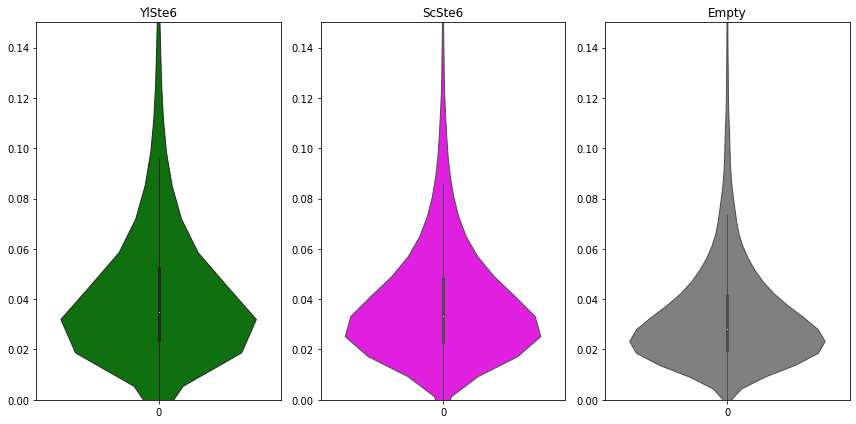

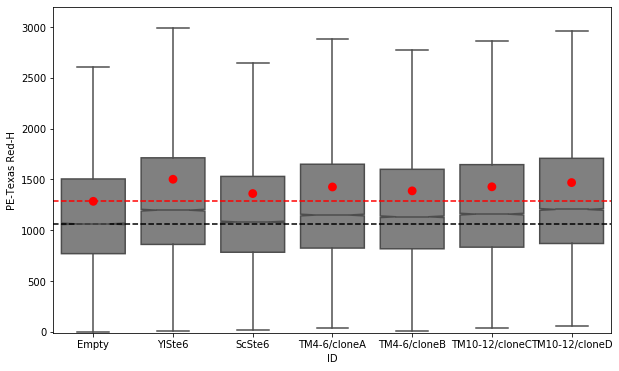

In [9]:
#fitcData = ({finalRafE05973.ID, finalRafE05973.data['FITC-A']}, 
#            {finalGalE05973.ID, finalGalE05973.data['FITC-A']}, 
#            {finalGalSte6.ID, finalGalSte6.data['FITC-A']})
#print(len(fitcData))
#finalYlSte6_01 = YlSte6_01
finalYlSte6_01 = YlSte6_01.apply(singletCellGating)
#finalYlSte6_02 = YlSte6_02.apply(singletCellGating)
#finalScSte6_01 = ScSte6_01
finalScSte6_01 = ScSte6_01.apply(singletCellGating)
#finalScSte6_02 = ScSte6_02.apply(singletCellGating)
#finalTM46cloneA_01 = TM46cloneA_01
finalTM46cloneA_01 = TM46cloneA_01.apply(singletCellGating)
#finalTM46cloneA_02 = TM46cloneA_02.apply(singletCellGating)
#finalTM46cloneB_01 = TM46cloneB_01
finalTM46cloneB_01 = TM46cloneB_01.apply(singletCellGating)
#finalTM46cloneB_02 = TM46cloneB_02.apply(singletCellGating)
#finalTM1012cloneC_01 = TM1012cloneC_01
finalTM1012cloneC_01 = TM1012cloneC_01.apply(singletCellGating)
#finalTM1012cloneC_02 = TM1012cloneC_02.apply(singletCellGating)
#finalTM1012cloneD_01 = TM1012cloneD_01
finalTM1012cloneD_01 = TM1012cloneD_01.apply(singletCellGating)
#finalTM1012cloneD_02 = TM1012cloneD_02.apply(singletCellGating)
#finalNegCtrl = NegCtrl.apply(singletCellGating)
#finalNegCtrl_01 = NegCtrl_01
finalNegCtrl_01 = NegCtrl_01.apply(singletCellGating)

finalYlSte6_01_Data = (finalYlSte6_01.data[['PE-Texas Red-H']])
finalYlSte6_01_Data.insert(0, 'ID', finalYlSte6_01.ID)
finalScSte6_01_Data = (finalScSte6_01.data[['PE-Texas Red-H']])
finalScSte6_01_Data.insert(0, 'ID', finalScSte6_01.ID)
finalTM46cloneA_01_Data = (finalTM46cloneA_01.data[['PE-Texas Red-H']])
finalTM46cloneA_01_Data.insert(0, 'ID', finalTM46cloneA_01.ID)
finalTM46cloneB_01_Data = (finalTM46cloneB_01.data[['PE-Texas Red-H']])
finalTM46cloneB_01_Data.insert(0, 'ID', finalTM46cloneB_01.ID)
finalTM1012cloneC_01_Data = (finalTM1012cloneC_01.data[['PE-Texas Red-H']])
finalTM1012cloneC_01_Data.insert(0, 'ID', finalTM1012cloneC_01.ID)
finalTM1012cloneD_01_Data = (finalTM1012cloneD_01.data[['PE-Texas Red-H']])
finalTM1012cloneD_01_Data.insert(0, 'ID', finalTM1012cloneD_01.ID)
#finalNegCtrl_Data = (finalNegCtrl.data[['PE-Texas Red-A']])
#finalNegCtrl_Data.insert(0, 'ID', finalNegCtrl.ID)
finalNegCtrl_01_Data = (finalNegCtrl_01.data[['PE-Texas Red-H']])
finalNegCtrl_01_Data.insert(0, 'ID', finalNegCtrl_01.ID)


plotData = pd.concat([finalNegCtrl_01_Data, finalYlSte6_01_Data, finalScSte6_01_Data, finalTM46cloneA_01_Data, finalTM46cloneB_01_Data, finalTM1012cloneC_01_Data, 
                     finalTM1012cloneD_01_Data])
meltedPlotData = pd.melt(plotData, "ID", var_name="measurement")
#print(plotData)

figure(figsize=(12,6))
ax1 = subplot(131)
ylim((0,0.15));
sns.violinplot(data=finalYlSte6_01.data['PE-Texas Red-H'].values[:20000]/finalYlSte6_01.data['FSC-H'].values[:20000], color="green", 
               bw=.2, cut=1, linewidth=1);
title(finalYlSte6_01.ID);
ax2 = subplot(132)
ylim((0,0.15));
sns.violinplot(data=finalTM46cloneB_01.data['PE-Texas Red-H'].values[:20000]/finalTM46cloneB_01.data['FSC-H'].values[:20000], color="magenta", 
               bw=.2, cut=1, linewidth=1)
title(finalScSte6_01.ID);
ax2 = subplot(133)
ylim((0,0.15));
sns.violinplot(data=finalNegCtrl_01.data['PE-Texas Red-H'].values[:20000]/finalNegCtrl_01.data['FSC-H'].values[:20000], color="grey", 
               bw=.2, cut=1, linewidth=1)
title(finalNegCtrl_01.ID);
plt.tight_layout()
#savefig('Control-FITC_violin.eps')

fig2 = figure(figsize=(10,6))
ylim((-10,3200));
sns.boxplot(x='ID', y='PE-Texas Red-H', color="grey", data=plotData, showfliers=False, notch=True)
sns.pointplot(x='ID', y='PE-Texas Red-H', color="red", data=plotData, ci=95, estimator=np.mean, join=False)
plt.hlines(finalNegCtrl_01.data['PE-Texas Red-H'].median(), -0.5, 6.5, linestyles="dashed", colors="black")
plt.hlines(finalNegCtrl_01.data['PE-Texas Red-H'].mean(), -0.5, 6.5, linestyles="dashed", colors="red")
#sns.violinplot(x='ID', y='PE-Texas Red-A', color="blue", data=plotData)
#sns.violinplot(x='ID', y='PE-Texas Red-A', data=plotData)

#savefig(data_dir+'/Ylipo-newGate_TransExpr_FluoH_boxplot_191228.pdf', dpi=300, transparent=True)

In [77]:
#finalYlSte6_01['Ratio'] = finalYlSte6_01.apply(lambda row: row['PE-Texas Red-A']/row['FITC-A'])
print(len(finalNegCtrl_01[finalNegCtrl_01['PE-Texas Red-A'] > 0]))
print(len(finalNegCtrl_01[finalNegCtrl_01['PE-Texas Red-H'] > 0]))
#finalTM1012cloneC_01[finalTM1012cloneC_01['PE-Texas Red-H'] > 0]

18577
22110


In [82]:
statistic, pvalue = ttest_ind(finalNegCtrl_01_Data['PE-Texas Red-H'].values, finalTM46cloneB_01_Data['PE-Texas Red-H'].values, equal_var=False)
print(statistic, pvalue)
print(finalNegCtrl_01_Data['PE-Texas Red-H'].median(), finalTM46cloneB_01_Data['PE-Texas Red-H'].median(), finalYlSte6_01_Data['PE-Texas Red-H'].median(),
      finalScSte6_01_Data['PE-Texas Red-H'].median())

-10.17802731763174 2.6507904395489076e-24
1062.0 1132.0 1197.0 1081.0
